In [63]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [64]:
# Read dataset
dataset = pd.read_csv("Admission_Predict.csv")

In [65]:
datasetcriterion = 'entropy'

In [66]:
# collect information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SerialNo           400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [67]:
# Describe your dataset
dataset.describe()

,SerialNo,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [68]:
dataset.dtypes

SerialNo               int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [69]:
#Find how many null values are present
dataset.isna().sum()

SerialNo             0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [70]:
#Shape of the dataset
dataset.shape

(400, 9)

In [71]:
dataset.isna()
# NO null values

,SerialNo,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False,False


In [72]:
x = dataset.iloc[:, :5].values # Selection of few columns for exercise purpose

In [73]:
print(x)

[[  1.  337.  118.    4.    4.5]
 [  2.  324.  107.    4.    4. ]
 [  3.  316.  104.    3.    3. ]
 ...
 [398.  330.  116.    4.    5. ]
 [399.  312.  103.    3.    3.5]
 [400.  333.  117.    4.    5. ]]


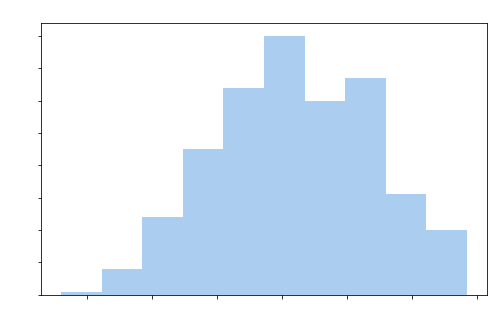

In [74]:
# DRAW A HISTOGRAM
import matplotlib.pyplot as plt

cgpa_data = dataset['CGPA']

# Plotting the histogram
plt.figure(figsize=(8, 5))
plt.xticks(color = 'white')
plt.yticks(color = 'white')
plt.hist(cgpa_data, color='#abcdef')  # Assuming 'CGPA' column contains the CGPA values
plt.xlabel('CGPA' ,color ='white')
plt.ylabel('STUDENTS',color ='white')
plt.title('CGPA VS STUDENT',color ='white')
plt.show()

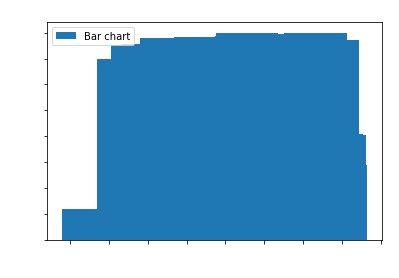

In [75]:
# DRAW A BARCHART
plt.xlabel('CGPA',color ='white')
plt.ylabel('Serial number',color ='white')
plt.title('CGPA vs Serial no.',color ='white') 
plt.xticks(color = 'white')
plt.yticks(color = 'white')
plt.bar(dataset.CGPA, dataset.SerialNo, label='Bar chart')
plt.legend()

#Here just change plot by bar 

In [113]:
#APPLY LABEL ENCODING TO THE Y COLUMNS 
dataset.iloc[:,-1] = dataset.iloc[:,-1].apply(lambda x: 1 if x > 0.5 else 0)

In [115]:
print(y)

[1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1
 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1]


In [84]:
# CHECK Y COLUMN 
dataset.iloc[:,-1]

0      1
1      1
2      1
3      1
4      1
      ..
395    1
396    1
397    1
398    1
399    1
Name: Chance of Admit , Length: 400, dtype: int64

In [85]:
#SPLITTING THE DATASET INTO x and y
x = dataset.iloc[:, [1,2,3,4,5,6,7]].values
y = dataset.iloc[:, -1].values

In [86]:
print(x)

[[337.   118.     4.   ...   4.5    9.65   1.  ]
 [324.   107.     4.   ...   4.5    8.87   1.  ]
 [316.   104.     3.   ...   3.5    8.     1.  ]
 ...
 [330.   116.     4.   ...   4.5    9.45   1.  ]
 [312.   103.     3.   ...   4.     8.78   0.  ]
 [333.   117.     4.   ...   4.     9.66   1.  ]]


In [88]:
#splitting of test set and training by 75:25 ratio
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [89]:
#importing standarscaler library from sklearn 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#apply fit transform to bothx_test and x_train
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [90]:
print(x_train)

[[ 0.28270144 -0.55273851 -0.09692788 ... -1.0947599  -0.07016885
   0.88640526]
 [-0.14050431 -0.06788017 -0.95217384 ... -0.54370626 -0.18484167
   0.88640526]
 [-0.47906891 -0.06788017  0.75831809 ...  1.10945467  0.63424993
   0.88640526]
 ...
 [-2.25653307 -0.55273851  0.75831809 ... -1.0947599  -1.8885522
  -1.12815215]
 [ 1.8908833   1.87155319  1.61356406 ...  0.55840102  1.78097817
  -1.12815215]
 [ 0.45198374  0.41697817  0.75831809 ...  1.66050831  0.84721374
   0.88640526]]


In [91]:
print(x_test)

[[-0.64835121 -0.39111906  1.61356406  0.05765323  0.00734738 -0.08655068
  -1.12815215]
 [-0.73299236  0.41697817  0.75831809  0.05765323 -0.54370626 -0.02102335
  -1.12815215]
 [ 0.79054835  0.41697817 -0.09692788  0.05765323  0.00734738  0.24108596
   0.88640526]
 [-0.90227466 -0.39111906 -0.95217384 -0.42279036 -1.0947599  -0.57800564
  -1.12815215]
 [-0.05586316 -0.39111906 -0.09692788 -0.42279036  0.00734738  0.19194046
  -1.12815215]
 [-0.64835121 -1.19921629 -0.95217384 -0.42279036 -0.54370626 -0.84011495
  -1.12815215]
 [-0.39442776  0.25535873 -0.09692788 -0.42279036 -0.54370626  0.12641314
  -1.12815215]
 [-0.39442776 -0.55273851 -0.09692788  0.05765323  0.55840102 -0.85649678
  -1.12815215]
 [ 1.29839525  1.70993374 -0.95217384  1.01854042  0.00734738  1.22399588
   0.88640526]
 [ 1.2137541   1.5483143   0.75831809  1.01854042  1.66050831  1.32228687
   0.88640526]
 [-1.41012157 -0.39111906 -1.80741981 -2.34456475 -1.64581354 -1.33156991
  -1.12815215]
 [ 1.3830364   0.9018

In [92]:
# APPLY DECISION TREE Model by importing libraries from sklearn 

In [93]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [103]:
#IMPORT THE METRICS CONFUSION MATRIX AND ACCURACY SCORE FROM SKLEARN LIBRARY
from sklearn.metrics import confusion_matrix, accuracy_score
# PREDICT THE VALUES USINGCLASSIFIER MODEL
y_pred = classifier.predict(x_test)
# CREATE A CONFUSION MATRIX AS PER THE PREDICTION
cm = confusion_matrix(y_test, y_pred)
# PRINT THE METRIX
print(cm)
# PRINT ACCURACY OF YOUR MODEL
accuracy_score(y_test, y_pred)*100

[[ 3  5]
 [ 4 88]]


91.0

In [95]:
print(len(x))
print(len(y))


400
400


In [129]:
fn = ['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA','Research']
cn = ['Chance of Admit']

In [135]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
from sklearn import tree

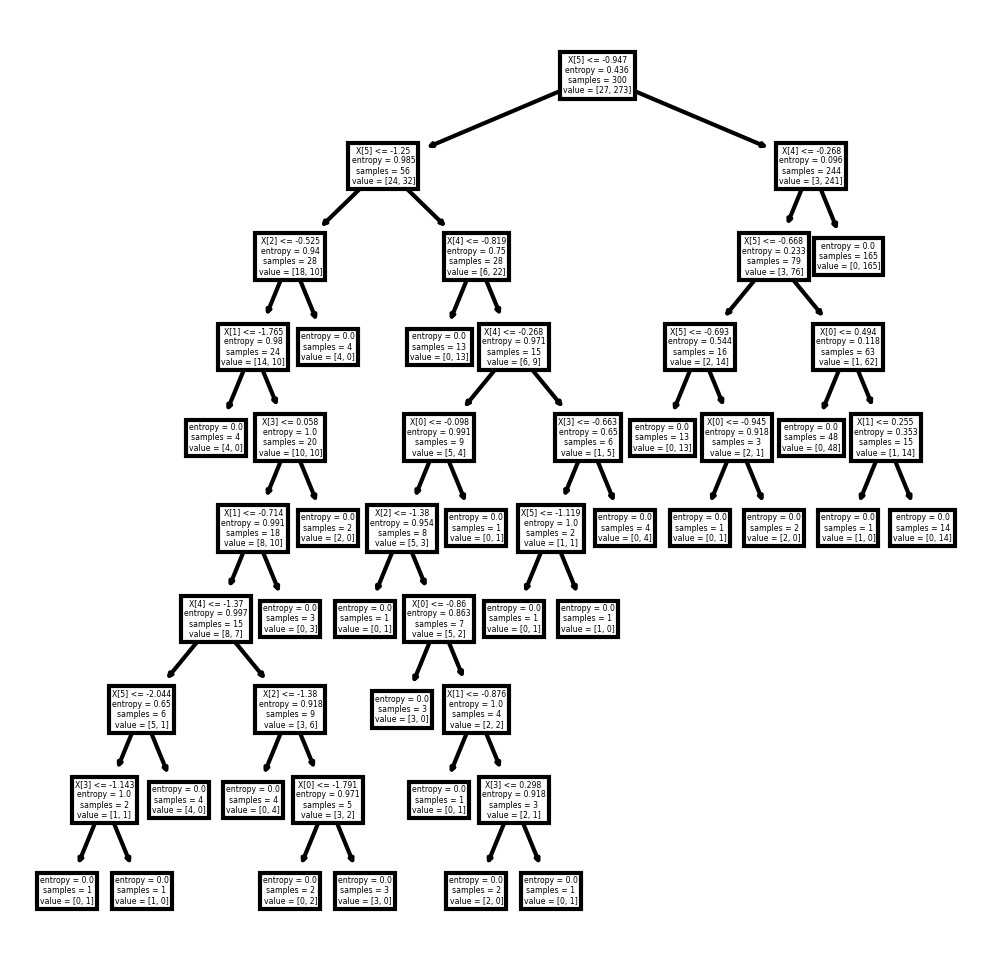

In [138]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(classifier);